In [9]:
from PrimeNumbersFunction import check_is_prime_number
from Tests import test__check_is_prime_number
from time import monotonic
from tqdm import tqdm_notebook as tqdm
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Проверка числа на простоту

In [2]:
test__check_is_prime_number()

In [6]:
numbers = [number for number in range(2, 3001)]
long_times = []
short_times = []
retries_amount = 1000
for number in tqdm(numbers):
    start_time = monotonic()
    for ret in range(retries_amount):
        long_time_answer = True
        for i in range(2, number):
            if number % i == 0:
                long_time_answer = False
    long_times.append((monotonic() - start_time) / retries_amount)
    start_time = monotonic()
    for ret in range(retries_amount):
        short_time_answer = check_is_prime_number(number)
    short_times.append((monotonic() - start_time) / retries_amount)

<ipython-input-6-6f7ad6e6e6de>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for number in tqdm(numbers):


  0%|          | 0/2999 [00:00<?, ?it/s]

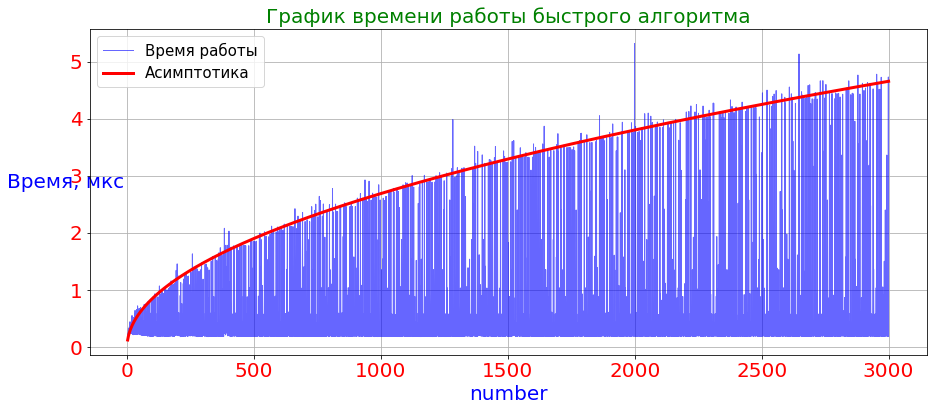

In [18]:
shaping = 1e6

plt.figure(figsize=(15, 6))
plt.plot(numbers,
         [elem * shaping for elem in short_times],
         color="blue", 
         linestyle="-",
         label="Время работы",
         linewidth=1,
         alpha=0.6)
plt.plot(numbers,
         [0.85 * 1e-7 * np.sqrt(number) * shaping for number in numbers],
         color='red',
         label='Асимптотика',
         linewidth=3)
plt.legend(fontsize=15)
plt.grid(True)
plt.title("График времени работы быстрого алгоритма", fontsize=20, color="green")
plt.xlabel("number", fontsize=20, color="blue")
plt.ylabel("Время, мкс", fontsize=20, rotation=0, color="blue")
plt.xticks(fontsize=20, color="red")
plt.yticks(fontsize=20, color="red")
plt.show()

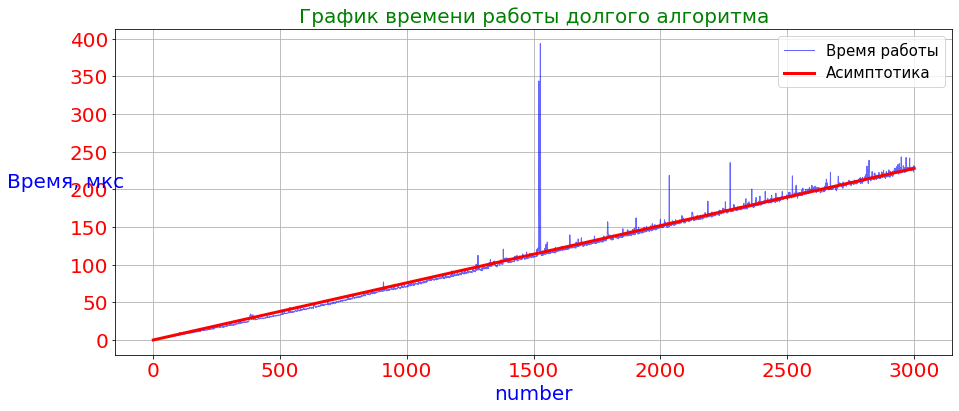

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(numbers,
         [elem * shaping for elem in long_times],
         color="blue", 
         linestyle="-",
         label="Время работы",
         linewidth=1,
         alpha=0.6)
plt.plot(numbers,
         [0.76 * 1e-7 * number * shaping for number in numbers],
         color='red',
         label='Асимптотика',
         linewidth=3)
plt.legend(fontsize=15)
plt.grid(True)
plt.title("График времени работы долгого алгоритма", fontsize=20, color="green")
plt.xlabel("number", fontsize=20, color="blue")
plt.ylabel("Время, мкс", fontsize=20, rotation=0, color="blue")
plt.xticks(fontsize=20, color="red")
plt.yticks(fontsize=20, color="red")
plt.show()

Как видно из экспериментов, время работы быстрого алгоритма пропорционально корню из числа, при этом иногда бывает гораздо быстрее. В целом, интересует только время в худшем случае, поэтому можно считать, что график зависимости в действительности пропорционален корню. Притом константа примерно та же, что и у наивного алгоритма, а именно 0.075-0.085 мкс за единицу.

## Факторизация числа

In [10]:
from PrimeNumbersFunction import factorize_number
from Tests import test__factorize_number

In [3]:
test__factorize_number()

In [4]:
factorize_number(2 ** 4 * 3 ** 2 * 5 ** 7)

{2: 4, 3: 2, 5: 7}

In [5]:
numbers = [number for number in range(2, 3001)]
times = []
retries_amount = 1000
for number in tqdm(numbers):
    start_time = monotonic()
    for ret in range(retries_amount):
        answer = factorize_number(number)
    times.append((monotonic() - start_time) / retries_amount)

<ipython-input-5-463971c99143>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for number in tqdm(numbers):


  0%|          | 0/2999 [00:00<?, ?it/s]

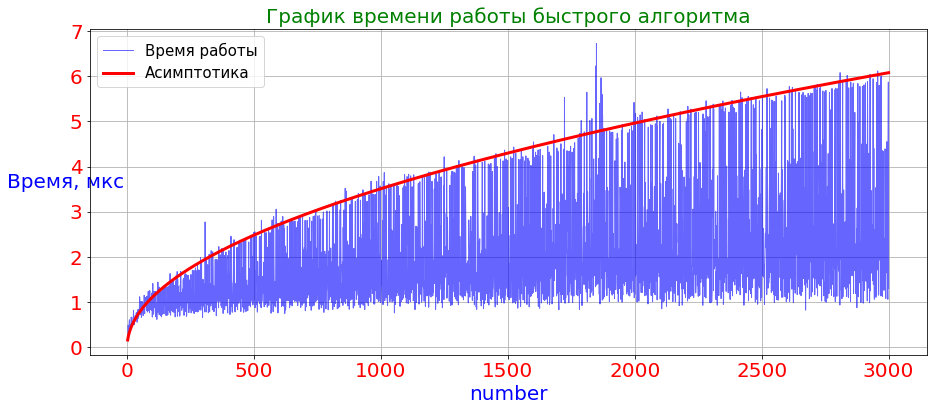

In [11]:
shaping = 1e6

plt.figure(figsize=(15, 6))
plt.plot(numbers,
         [elem * shaping for elem in times],
         color="blue", 
         linestyle="-",
         label="Время работы",
         linewidth=1,
         alpha=0.6)
plt.plot(numbers,
         [1.11 * 1e-7 * np.sqrt(number) * shaping for number in numbers],
         color='red',
         label='Асимптотика',
         linewidth=3)
plt.legend(fontsize=15)
plt.grid(True)
plt.title("График времени работы быстрого алгоритма", fontsize=20, color="green")
plt.xlabel("number", fontsize=20, color="blue")
plt.ylabel("Время, мкс", fontsize=20, rotation=0, color="blue")
plt.xticks(fontsize=20, color="red")
plt.yticks(fontsize=20, color="red")
plt.show()

Видно, что асимптотическое время работы тоже O(sqrt(n)), просто константа стала немного больше. Это связано с тем, что вместо обычной проверки делимости мы также и делим число, пока делится.

## Функция Эйлера

In [11]:
from PrimeNumbersFunction import gcd, euler_function
from Tests import test__euler_function

In [8]:
test__euler_function()

In [15]:
numbers = [number for number in range(2, 5001)]
times = []
retries_amount = 1000
for number in tqdm(numbers):
    start_time = monotonic()
    for ret in range(retries_amount):
        answer = euler_function(number)
    times.append((monotonic() - start_time) / retries_amount)

<ipython-input-15-08aa424042c0>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for number in tqdm(numbers):


  0%|          | 0/4999 [00:00<?, ?it/s]

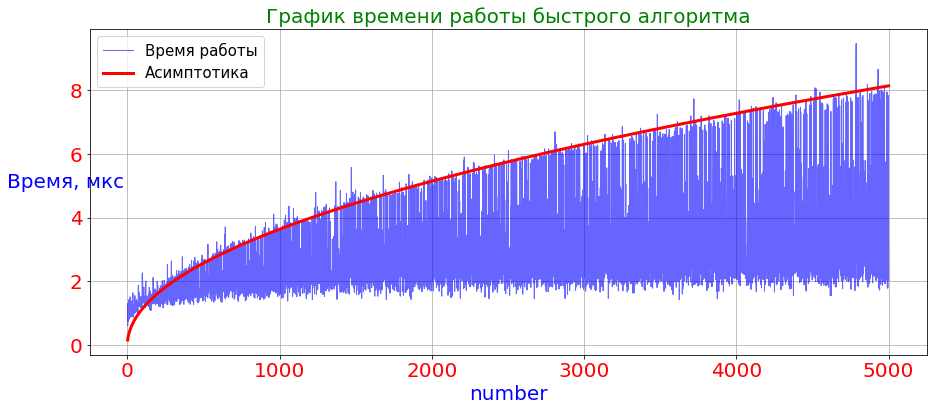

In [17]:
shaping = 1e6

plt.figure(figsize=(15, 6))
plt.plot(numbers,
         [elem * shaping for elem in times],
         color="blue", 
         linestyle="-",
         label="Время работы",
         linewidth=1,
         alpha=0.6)
plt.plot(numbers,
         [1.15 * 1e-7 * np.sqrt(number) * shaping for number in numbers],
         color='red',
         label='Асимптотика',
         linewidth=3)
plt.legend(fontsize=15)
plt.grid(True)
plt.title("График времени работы быстрого алгоритма", fontsize=20, color="green")
plt.xlabel("number", fontsize=20, color="blue")
plt.ylabel("Время, мкс", fontsize=20, rotation=0, color="blue")
plt.xticks(fontsize=20, color="red")
plt.yticks(fontsize=20, color="red")
plt.show()

In [18]:
euler_function(100)

40

## Решето Эратосфена

In [12]:
from PrimeNumbersFunction import eratosthenes_sieve
from Tests import test__eratosthenes_sieve

In [6]:
test__eratosthenes_sieve()

In [8]:
eratosthenes_sieve(50)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

In [9]:
numbers = [number for number in range(2, 5001)]
times = []
retries_amount = 100
for number in tqdm(numbers):
    start_time = monotonic()
    for ret in range(retries_amount):
        answer = eratosthenes_sieve(number)
    times.append((monotonic() - start_time) / retries_amount)

<ipython-input-9-61ec6e5d7e3d>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for number in tqdm(numbers):


  0%|          | 0/4999 [00:00<?, ?it/s]

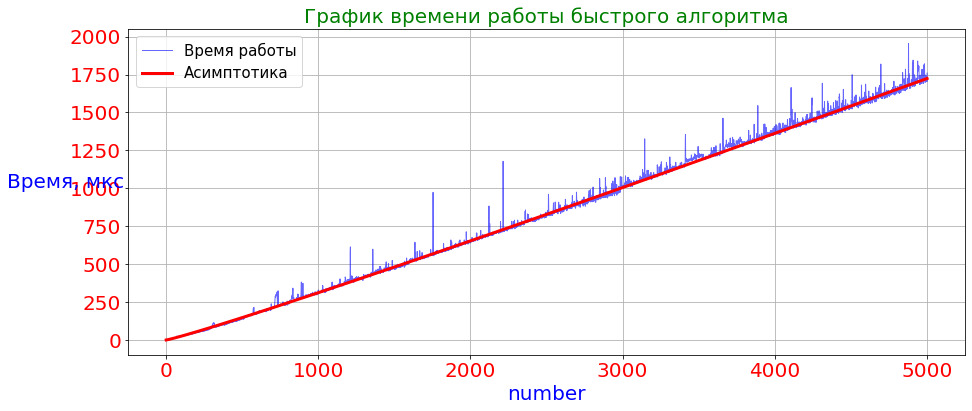

In [16]:
shaping = 1e6

plt.figure(figsize=(15, 6))
plt.plot(numbers,
         [elem * shaping for elem in times],
         color="blue", 
         linestyle="-",
         label="Время работы",
         linewidth=1,
         alpha=0.6)
plt.plot(numbers,
         [1.61 * 1e-7 * number * np.log(np.log(number)) * shaping for number in numbers],
         color='red',
         label='Асимптотика',
         linewidth=3)
plt.legend(fontsize=15)
plt.grid(True)
plt.title("График времени работы быстрого алгоритма", fontsize=20, color="green")
plt.xlabel("number", fontsize=20, color="blue")
plt.ylabel("Время, мкс", fontsize=20, rotation=0, color="blue")
plt.xticks(fontsize=20, color="red")
plt.yticks(fontsize=20, color="red")
plt.show()

## Расширенный алгоритм Евклида

In [13]:
from PrimeNumbersFunction import extended_euclid_algorithm
from Tests import test__extended_euclid_algorithm

In [6]:
test__extended_euclid_algorithm()

In [7]:
extended_euclid_algorithm(7 * 11, 7 * 13)

(7, (6, -5))

## Поиск обратного элемента в кольце

In [14]:
from PrimeNumbersFunction import inversed_in_ring
from Tests import test__inversed_in_ring

In [7]:
test__inversed_in_ring()

In [8]:
inversed_in_ring(7, 37)

16

## Бинарный поиск

In [1]:
from PrimeNumbersFunction import meet_in_the_middle
from SearchElements import binary_search
from Tests import test__binary_search

In [3]:
test__binary_search()

In [8]:
print(binary_search(5, lambda x: [1, 3, 4, 5, 6, 7, 8, 9, 10][x], 9))
print(binary_search(2, lambda x: [1, 3, 4, 5, 6, 7, 8, 9, 10][x], 9))

3
-1


In [15]:
meet_in_the_middle(lambda x: x, lambda y: y ** 2, list(range(105)), list(range(21)))

[(0, 0),
 (1, 1),
 (4, 2),
 (9, 3),
 (16, 4),
 (25, 5),
 (36, 6),
 (49, 7),
 (64, 8),
 (81, 9),
 (100, 10)]